## Preperations

Lets first import the relevant libraries and then load the data into the dataframe df

In [274]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [8]:
df = pd.read_csv("../data/King_County_House_prices_dataset.csv")

## Basic description of the data

First, we want to take a first look at our data and analyse its contents

In [26]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  


1. Non-null datapoints: Except the columns 'waterfront' and 'yr_renovated' all the columns only contain non-null datapoints. 21597 datapoints exist. 
1. Datatype: 'date' and 'sqft_basement' have a object datatype, the rest are either int 64 or float 64



Lets take a look at the distribution of prices since this is the independent value we are most interested in


/Users/clemensbretscher/neuefische/ds-linear-regression/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

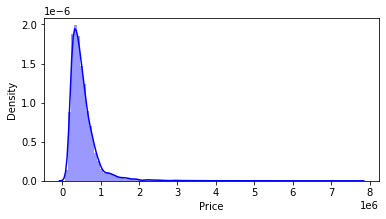

In [105]:
plt.figure(figsize=(6, 3))
fig = sns.distplot(df.price, color='blue', bins=100, hist_kws={'alpha':0.4})
fig.set(xlabel='Price', ylabel='Density')
plt.show

In [89]:
df.price.describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


The distribution of the price seems to follow a normal distribution. However, at  around 1,5 mil the distribution has a bump. the prices fo up to a maximum of 7.7 mil.

Above 1 mill:

<function matplotlib.pyplot.show(close=None, block=None)>

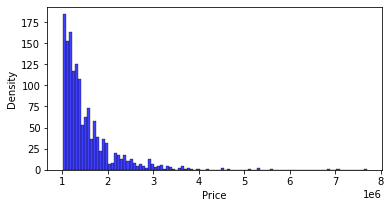

In [117]:
plt.figure(figsize=(6, 3))

fig = sns.histplot(df.query('price > 1000000').price, color='blue', bins=100)
fig.set(xlabel='Price', ylabel='Density')
plt.show

Above a price of 4 mill we can still see some datapoints. Since our client is more interested in cheaper houses, we should concentrate on houses below 1 mill. Later, we will exclude values above 1 mill for our model

We will plot now every column of the dataframe df (excluding the id column)

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>],
       [<AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'yr_built'}>],
       [<AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>],
       [<AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

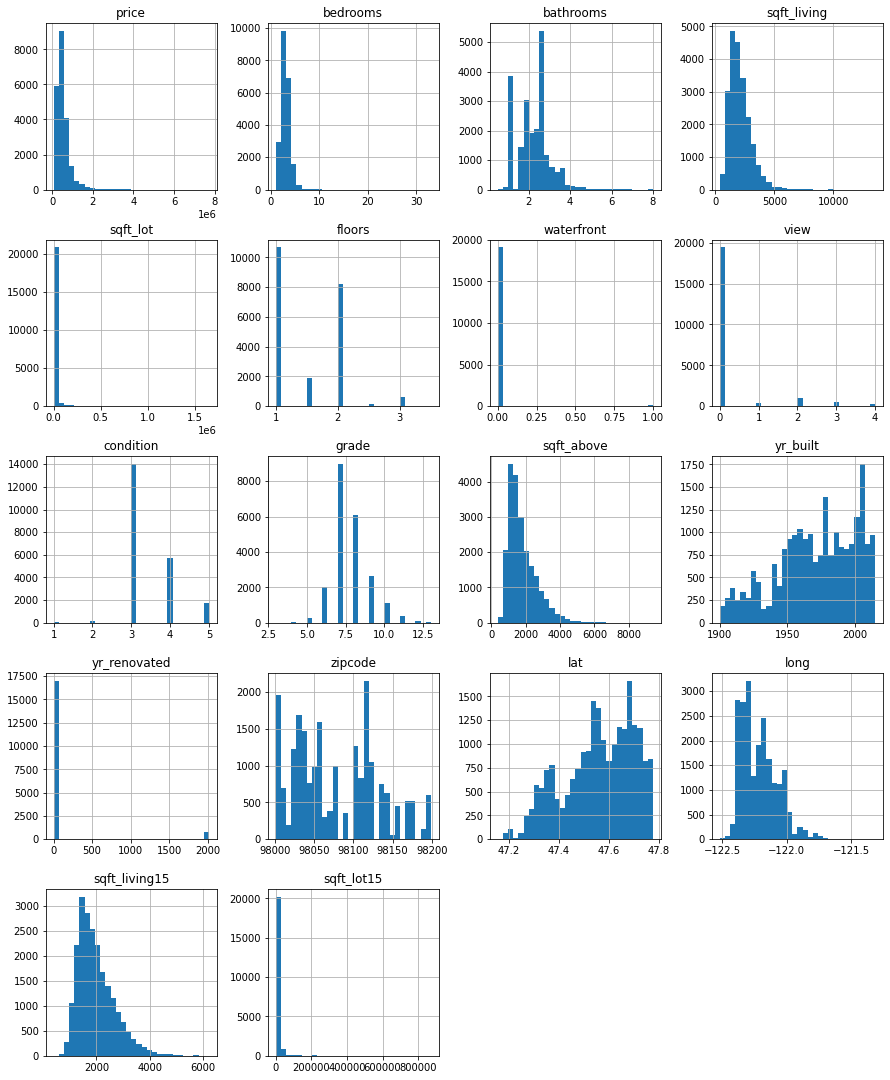

In [123]:
df_no_id = df.drop(labels='id', inplace=False, axis =1)
df_no_id.hist(bins =30, figsize = (15,19))

bedrooms, bathrooms, sqft_living, sqft_lot, sqft_above, long, sqft_living15, sqft_lot15 seem to follow the same distribution like price


*date and sqft_basement were not plotted since they have the datatype object. I was not too interested in these parameters, so I did not concentrate on them.* 

I will check now which factors correlate with the price:

In [147]:
df_no_id_corr = df_no_id.corr()['price'][1:]
best_correlators = df_no_id_corr[abs(df_no_id_corr)>0.5]
print ('correlations:\n' , df_no_id_corr, '\n\n')
print ('best correlators: \n' , best_correlators)

correlations:
 bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
waterfront       0.276295
view             0.395734
condition        0.036056
grade            0.667951
sqft_above       0.605368
yr_built         0.053953
yr_renovated     0.129599
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
Name: price, dtype: float64 


best correlators: 
 bathrooms        0.525906
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
Name: price, dtype: float64


Now I want to plot the price against the different factors

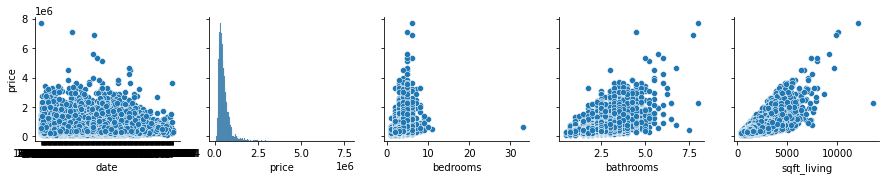

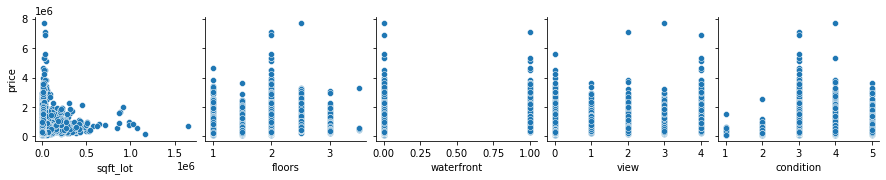

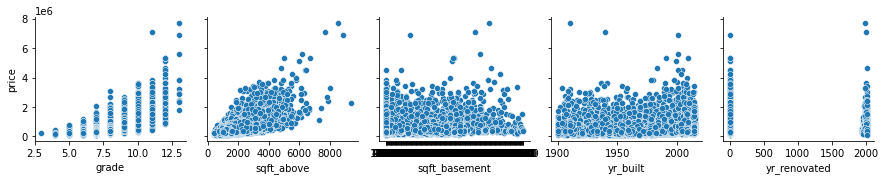

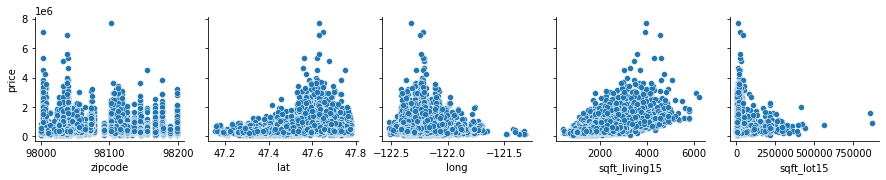

In [152]:
for i in range (0, len(df_no_id.columns), 5):
    sns.pairplot(data=df_no_id, y_vars=['price'], x_vars=df_no_id.columns[i:i+5])

Bedrooms, bathrooms, sqft_living, sqft_lot, grade, sqft_above, sqft_living15, sqft_lot15 seem to correlate with the price. Since zipcode is more like a categorical factor, it won`t correlate here with the price, when we just plot its value

## Hypotheses

### Testing every factor

Now I will test if any of the factors shows a positve result when making an OLS model

In [24]:
smf.ols(formula='price ~  bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + view + condition + grade + sqft_above + yr_built + yr_renovated + zipcode + lat + long + sqft_living15 + sqft_lot15', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2174.
Date:                Wed, 13 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:55:23   Log-Likelihood:            -2.1503e+05
No. Observations:               15762   AIC:                         4.301e+05
Df Residuals:                   15744   BIC:                         4.302e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.302e+06   3.48e+06      1.524      0.127   -1.52e+06    1.21e+07
bedrooms       -3.75e+04   2219.565    -16.895      0.000   -4.18e+04   -3.31e+04
bathrooms      4.469e+04   3864.212     11.564      0.000    3.71e+04    5.23e+04
sqft_living     154.5053      5.169     29.892      0.000     144.374     164.637
sqft_lot          0.0939      0.056      1.670      0.095      -0.016       0.204
floors         4029.0029   4268.398      0.944      0.345   -4337.547    1.24e+04
waterfront     6.098e+05   2.05e+04     29.679      0.000     5.7e+05     6.5e+05
view           5.283e+04   2552.740     20.696      0.000    4.78e+04    5.78e+04
condition      2.653e+04   2785.489      9.525      0.000    2.11e+04     3.2e+04
grade          9.375e+04   2570.660     36.470      0.000    8.87e+04    9.88e+04
sqft_above       38.2463      5.138      7.444      0.000      28.175      48.317
yr_built      -2674.2510     85.958    -31.111      0.000   -2842.739   -2505.763
yr_renovated     19.8281      4.368      4.540      0.000      11.267      28.389
zipcode        -571.0855     39.078    -14.614      0.000    -647.682    -494.489
lat             6.04e+05   1.27e+04     47.578      0.000    5.79e+05    6.29e+05
long          -2.174e+05   1.56e+04    -13.964      0.000   -2.48e+05   -1.87e+05
sqft_living15    15.6360      4.109      3.805      0.000       7.581      23.691
sqft_lot15       -0.3382      0.085     -3.998      0.000      -0.504      -0.172
==============================================================================
Omnibus:                    13694.698   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1491014.115
Skew:                           3.668   Prob(JB):                         0.00
Kurtosis:                      50.080   Cond. No.                     2.16e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The highest t-values are reached for bedrooms (-16.895), bathrooms (11.564), sqft_living (29.892), waterfront (29.679), view (20.696), grade (36.470), yr_built(-31.111), zipcode (-14.614), lat (47.578) and long (-13.964	)

Since the zipcode are random numbers its correlation with the price does not make any sense here. Also the lat and long are most likely not good predictors for house prices, since cities can be complex with many different areas, regarding the housing prices. 

### `My hypotheses:`

1. If there is a waterfront the price will be pricier
<br><br>
1. The worse the grade and the condition the cheaper the house
<br><br>
1. The price depends on the zip code
<br><br>
<br><br>
*the longer the last renovation has been done the cheaper the price. 
year renovated: does not want frehsly renovated*




### Price dependency on Waterfront

First, I want to check the price dependency by the waterfront. The waterfront factor is a categorical factor (0 meaning no waterfront, 1 meaning with waterfront). 2376 values are unknown (NaN). They will not be included in the analysis. 

The mean value of the price already gives us a good hint that the waterfront has an influence on the price:

In [32]:
df.groupby('waterfront').price.mean()

waterfront
0.0    5.326420e+05
1.0    1.717215e+06
Name: price, dtype: float64

The mean price of a house with a waterfront is around three times higher. 

Now I want to plot the price and waterfront in a scatterplot with a logarithmic axis for price.

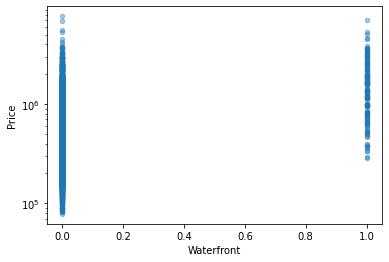

In [225]:
fig = df.plot(kind='scatter', x='waterfront', y='price', alpha=0.4)
fig.set(xlabel='Waterfront', ylabel='Price')
fig.set_yscale('log')

Here we can also see the shift in price depending on the waterfront value

Next I want to test my hypothesis using the OLS model.

In [230]:
smf.ols(formula='price ~ waterfront', data=df).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     1588.
Date:                Wed, 13 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:24:33   Log-Likelihood:            -2.7306e+05
No. Observations:               19221   AIC:                         5.461e+05
Df Residuals:                   19219   BIC:                         5.461e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.326e+05   2590.404    205.621      0.000    5.28e+05    5.38e+05
waterfront  1.185e+06   2.97e+04     39.855      0.000    1.13e+06    1.24e+06
==============================================================================
Omnibus:                    16093.329   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           894387.382
Skew:                           3.694   Prob(JB):                         0.00
Kurtosis:                      35.591   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

price = 5.326 * 10<sup>05</sup> + 1.185 * 10<sup>06</sup> * waterfront

The t-value of the coefficient and the slope seem quite high and the P>|t| quite low.

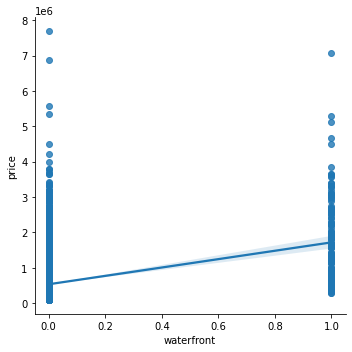

In [308]:
sns.lmplot(data=df, x='waterfront', y='price')

Interpretation: 
<p>Usually an expensive house is not described by its location at a body of water. Of course there are many expensive houses that do not have a waterfront. That is probably the reason why the R<sup>2</sup> has such a low value (0.076)

### Price dependency on condition and grade

Here, I want to analyse the dependence of the price on the condition and the grade. First, I want to get an overview over these factors. Therefore, I am grouping the dataset on the condition/grade and checking the mean price.

In [277]:
df.groupby('condition').price.mean()

condition
1    341067.241379
2    328178.758824
3    542173.057347
4    521374.450414
5    612577.742504
Name: price, dtype: float64

In [34]:
df.groupby('grade').price.mean()

grade
3     2.620000e+05
4     2.120019e+05
5     2.485240e+05
6     3.019166e+05
7     4.025946e+05
8     5.429868e+05
9     7.737382e+05
10    1.072347e+06
11    1.497792e+06
12    2.202528e+06
13    3.710769e+06
Name: price, dtype: float64

We can already see that the grade is a very stable predictor of the mean price. For the condition this relationship is not so strong, however, it still seems to exist. 

Next I will plot these variables again:

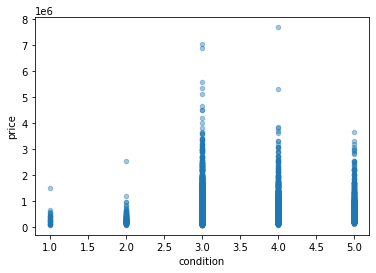

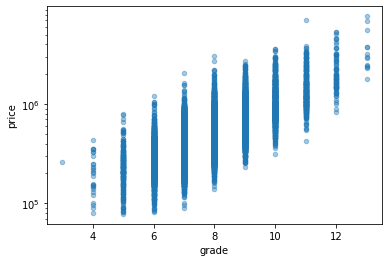

In [278]:
fig = df.plot(kind='scatter', x='condition', y='price', alpha=0.4)
fig = df.plot(kind='scatter', x='grade', y='price', alpha=0.4)
fig.set_yscale('log')

The plots underline the previous finding. 

Next I want to test my hypothesis using the OLS model.

In [283]:
smf.ols(formula='price ~ condition', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     28.11
Date:                Wed, 13 Oct 2021   Prob (F-statistic):           1.16e-07
Time:                        22:50:24   Log-Likelihood:            -3.0738e+05
No. Observations:               21597   AIC:                         6.148e+05
Df Residuals:                   21595   BIC:                         6.148e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.709e+05   1.33e+04     35.322      0.000    4.45e+05    4.97e+05
condition   2.036e+04   3840.295      5.302      0.000    1.28e+04    2.79e+04
==============================================================================
Omnibus:                    19113.390   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1136802.126
Skew:                           4.025   Prob(JB):                         0.00
Kurtosis:                      37.619   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [282]:
smf.ols(formula='price ~ grade', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                 1.740e+04
Date:                Wed, 13 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:50:07   Log-Likelihood:            -3.0101e+05
No. Observations:               21597   AIC:                         6.020e+05
Df Residuals:                   21595   BIC:                         6.020e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.061e+06   1.23e+04    -86.396      0.000   -1.09e+06   -1.04e+06
grade       2.092e+05   1585.790    131.895      0.000    2.06e+05    2.12e+05
==============================================================================
Omnibus:                    19879.964   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2043898.709
Skew:                           4.081   Prob(JB):                         0.00
Kurtosis:                      49.954   Cond. No.                         52.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The t value for condition is not quite as high. Also with an R<sup>2></sup> of 0.001 this value is extremely low. However, the t value and its corresponding P>|t| are relatively high and low, respectively. Also the R<sup>2></sup> value (0.446) is much higher compared to condition.  

price = 4.709 x 10<sup>5</sup> +	2.036 x 10<sup>4</sup>  x condition
<br><br>
price  =  -1.061 x 10<sup>6</sup>   +	2.092 x 10<sup>5</sup>  x grade

Interpretation:
<p>The price of the house seems to correlate with the grade of the house. This grade is based on King County grading system, which seems to be a much better predictor than the overall condition. It is not clear to me, how the overall condition was estimated. 


Lets plot the residuals:

In [307]:

...

Ellipsis

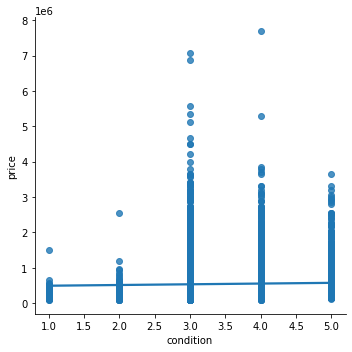

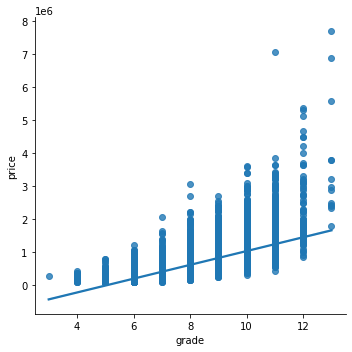

In [311]:
sns.lmplot(data=df, x='condition', y='price')
sns.lmplot(data=df, x='grade', y='price')

In the condition plot we can see that many pricy houses got a medium condition. It might be that these houses actually have a good grade but they need to get a renovation. I will exclude houses where the last rennovation was long ago.  

First, I will look at the distribution of yr_renovated, which shows the year of the last rennovation. 

<AxesSubplot:ylabel='Frequency'>

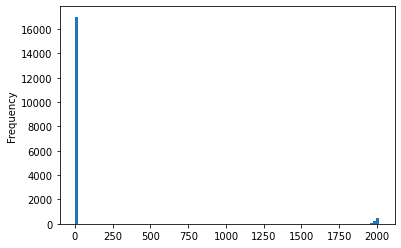

In [287]:
df.yr_renovated.plot(kind='hist',bins=100)

Most of the values have a value of zero, which probably means that it is not known when they were renovated last, or they were never renovated. If we take a look of the distribution of the acutally renovated houses, we see this:

<AxesSubplot:ylabel='Frequency'>

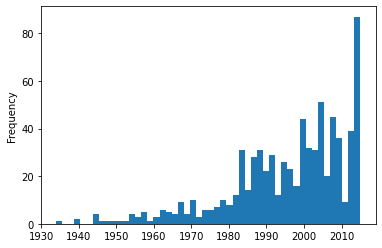

In [297]:
df[df['yr_renovated']>1750].yr_renovated.plot(kind='hist', bins =50)

Lets check the condition distribution of these houses:

<AxesSubplot:xlabel='condition', ylabel='price'>

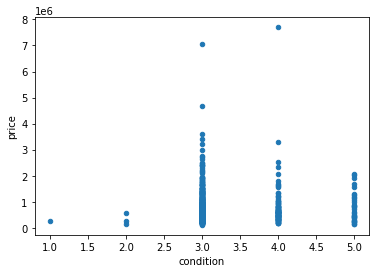

In [291]:
df_ren = df[df['yr_renovated']>1750]
df_ren.plot(kind='scatter',x='condition',y='price')

If we make a regression model, we get the following:

In [293]:
smf.ols(formula='price ~ condition', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     28.11
Date:                Wed, 13 Oct 2021   Prob (F-statistic):           1.16e-07
Time:                        23:21:36   Log-Likelihood:            -3.0738e+05
No. Observations:               21597   AIC:                         6.148e+05
Df Residuals:                   21595   BIC:                         6.148e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.709e+05   1.33e+04     35.322      0.000    4.45e+05    4.97e+05
condition   2.036e+04   3840.295      5.302      0.000    1.28e+04    2.79e+04
==============================================================================
Omnibus:                    19113.390   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1136802.126
Skew:                           4.025   Prob(JB):                         0.00
Kurtosis:                      37.619   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Again, the R<sup>2</sup> value is extremly low. 
<p>Lets look at the yr_renovated distribution again. 

Now lets exclude houses that were not renovated after 1985

<AxesSubplot:xlabel='condition', ylabel='price'>

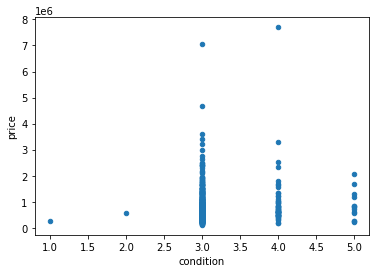

In [295]:
df_ren = df[df['yr_renovated']>1985]
df_ren.plot(kind='scatter',x='condition',y='price')

The distribution still looks very similar. excluding certain values in yr_renovated did not change the appearance of the condition-distribution. 

I will quickly check with what the condition correlates:

In [299]:
df_no_id_corr = df_no_id.corr()['condition']
df_no_id_corr

price            0.036056
bedrooms         0.026496
bathrooms       -0.126479
sqft_living     -0.059445
sqft_lot        -0.008830
floors          -0.264075
waterfront       0.017642
view             0.045735
condition        1.000000
grade           -0.146896
sqft_above      -0.158904
yr_built        -0.361592
yr_renovated    -0.061858
zipcode          0.002888
lat             -0.015102
long            -0.105877
sqft_living15   -0.093072
sqft_lot15      -0.003126
Name: condition, dtype: float64

Condtion seems to correlate with the year the house was built. 

<AxesSubplot:ylabel='Frequency'>

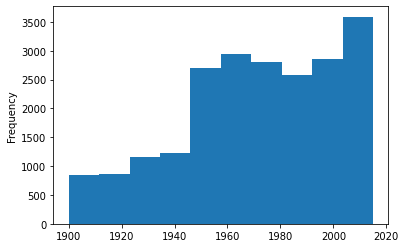

In [300]:
df.yr_built.plot(kind='hist')

lets exclude houses that were built before 1950 and plot the distribution of the condition again.

<AxesSubplot:xlabel='condition', ylabel='price'>

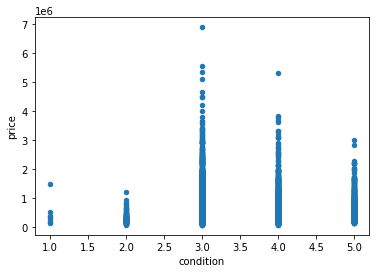

In [301]:
df_built = df[df['yr_built']>=1950]
df_built.plot(kind='scatter',x='condition',y='price')

The distribution still looks the same. I cannot figure out, why the condition distirbution looks like that...

### Price Dependency on Zip Code

Now I want to look if the price depends on the zip code. First I want to get an overview of the data by 
1. grouping the houses with the same zip code together, calculating their mean value and sorting them on the price.
1. Next, I am creating a new dataframe from this Series, and turning the zipcodes into strings
1. Last, I want to plot this new dataframe as a scatterplot

<AxesSubplot:xlabel='zipcode', ylabel='price'>

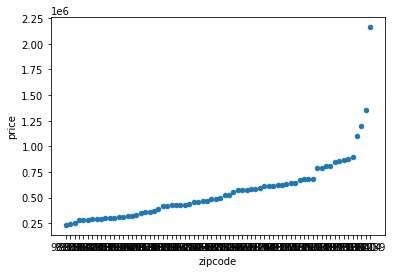

In [241]:
#1
sorted_df = df.groupby('zipcode').price.mean().sort_values()
#2
df_sorted_df = pd.DataFrame({'zipcode':sorted_df_edit.index, 'price':sorted_df_edit.values})
df_sorted_df['zipcode'] = df_sorted_df_edit['zipcode'].apply(str)
#3
df_sorted_df.plot(kind='scatter', x='zipcode', y='price')


We can see here that different zip codes clearly have different average prices. Four zip codes seem to be exceptionally expensive. Furthermore, there seems to be one cluster of zip codes that are separated by the others by a jump in the price. 

We have a good hint that the zip codes influences the price. Since the zipcode is a categorical value we have to use dummy variables in otder to make linear regression:

1. Copying the dataframe into a new dataframe to avoid changes in the original one
1. create dummy variables for the zipcode
1. Creating a new dataframe with only the price as one columns. Then adding the zip_dummies to this new dataframe

In [252]:
#1
df_edit = df
#2
zip_dummies = pd.get_dummies(data=df_edit['zipcode'], prefix='zip', drop_first=True)
#3
df_price = df.price
df_price = pd.DataFrame({'price':df_price.values})
df_edit = pd.concat([df_price, zip_dummies], axis=1)

df_edit.head()

,price,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,221900.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,180000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


As an example I will plot two of the zip codes:

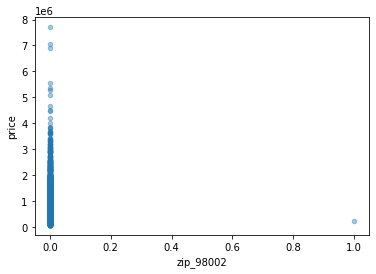

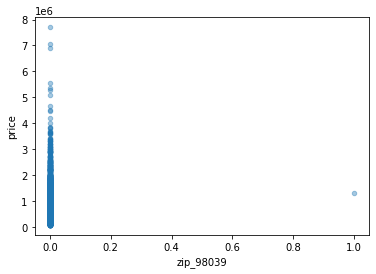

In [255]:
fig = df_edit.plot(kind='scatter', x='zip_98002', y='price', alpha=0.4)
fig = df_edit.plot(kind='scatter', x='zip_98039', y='price', alpha=0.4)
#die idee war alle auf einmal zu nehmen. 

In [275]:
X = df_edit.drop(['price'], axis=1)
y = df_edit.price
X = sm.add_constant(X)
model = sm.OLS(y, X)

results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7700
Date:                Wed, 13 Oct 2021   Prob (F-statistic):              0.921
Time:                        22:28:27   Log-Likelihood:            -3.0736e+05
No. Observations:               21597   AIC:                         6.149e+05
Df Residuals:                   21527   BIC:                         6.154e+05
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.403e+05   2504.721    215.715      0.000    5.35e+05    5.45e+05
zip_98002  -3.184e+05   3.68e+05     -0.866      0.386   -1.04e+06    4.02e+05
zip_98003  -2.485e+05   3.68e+05     -0.676      0.499   -9.69e+05    4.72e+05
zip_98004  -3.363e+05   3.68e+05     -0.915      0.360   -1.06e+06    3.84e+05
zip_98005   1.097e+05   3.68e+05      0.298      0.765   -6.11e+05     8.3e+05
zip_98006  -3.531e+04   3.68e+05     -0.096      0.923   -7.56e+05    6.85e+05
zip_98007   2.447e+05   3.68e+05      0.666      0.506   -4.76e+05    9.65e+05
zip_98008   5.969e+04   3.68e+05      0.162      0.871   -6.61e+05     7.8e+05
zip_98010  -2.113e+05   3.68e+05     -0.575      0.565   -9.32e+05    5.09e+05
zip_98011  -2.178e+05   3.68e+05     -0.593      0.553   -9.38e+05    5.03e+05
zip_98014   1.787e+05   3.68e+05      0.486      0.627   -5.42e+05    8.99e+05
zip_98019   1.267e+05   3.68e+05      0.345      0.730   -5.94e+05    8.47e+05
zip_98022  -1.031e+04   3.68e+05     -0.028      0.978   -7.31e+05     7.1e+05
zip_98023   6.897e+05   3.68e+05      1.877      0.061   -3.07e+04    1.41e+06
zip_98024   1.447e+05   3.68e+05      0.394      0.694   -5.76e+05    8.65e+05
zip_98027  -3.298e+05   3.68e+05     -0.897      0.370   -1.05e+06    3.91e+05
zip_98028   4.019e+04   3.68e+05      0.109      0.913    -6.8e+05    7.61e+05
zip_98029  -5.231e+04   3.68e+05     -0.142      0.887   -7.73e+05    6.68e+05
zip_98030  -3.108e+05   3.68e+05     -0.846      0.398   -1.03e+06     4.1e+05
zip_98031  -2.173e+05   3.68e+05     -0.591      0.554   -9.38e+05    5.03e+05
zip_98032  -3.603e+05   3.68e+05     -0.980      0.327   -1.08e+06     3.6e+05
zip_98033  -1.103e+05   3.68e+05     -0.300      0.764   -8.31e+05     6.1e+05
zip_98034   9694.6747   3.68e+05      0.026      0.979   -7.11e+05     7.3e+05
zip_98038  -1.553e+05   3.68e+05     -0.423      0.673   -8.76e+05    5.65e+05
zip_98039   7.897e+05   3.68e+05      2.149      0.032    6.93e+04    1.51e+06
zip_98040  -2.533e+05   3.68e+05     -0.689      0.491   -9.74e+05    4.67e+05
zip_98042  -1.403e+05   3.68e+05     -0.382      0.703   -8.61e+05     5.8e+05
zip_98045  -1.023e+05   3.68e+05     -0.278      0.781   -8.23e+05    6.18e+05
zip_98052  -1.953e+05   3.68e+05     -0.531      0.595   -9.16e+05    5.25e+05
zip_98053   3.797e+05   3.68e+05      1.033      0.302   -3.41e+05     1.1e+06
zip_98055  -7.231e+04   3.68e+05     -0.197      0.844   -7.93e+05    6.48e+05
zip_98056  -2.876e+05   3.68e+05     -0.783      0.434   -1.01e+06    4.33e+05
zip_98058  -5.531e+04   3.68e+05     -0.150      0.880   -7.76e+05    6.65e+05
zip_98059   1.557e+05   3.68e+05      0.424      0.672   -5.65e+05    8.76e+05
zip_98065   9.969e+04   3.68e+05      0.271      0.786   -6.21e+05     8.2e+05
zip_98070  -5305.3253   3.68e+05     -0.014      0.988   -7.26e+05    7.15e+05
zi

Lets re-plot the mean values of price sorted by the zipcode again:

<AxesSubplot:xlabel='zipcode', ylabel='price'>

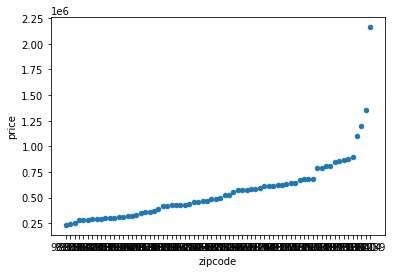

In [312]:
df_sorted_df.plot(kind='scatter', x='zipcode', y='price')


Can we make a regression model with these data?

I will assign each zipcode an index

In [331]:
labels = pd.factorize(df_sorted_df.zipcode)

df_sorted_df['idx_zipcode']=labels[0]
df_sorted_df


,zipcode,price,idx,idx_zipcode
0,98002,2.342840e+05,0,0
1,98168,2.403284e+05,1,1
2,98032,2.512962e+05,2,2
3,98001,2.811949e+05,3,3
4,98148,2.849086e+05,4,4
...,...,...,...,...
65,98102,8.996077e+05,65,65
66,98112,1.096239e+06,66,66
67,98040,1.194874e+06,67,67
68,98004,1.356524e+06,68,68


In [332]:
smf.ols(formula='price ~ idx', data=df_sorted_df).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     154.6
Date:                Thu, 14 Oct 2021   Prob (F-statistic):           3.54e-19
Time:                        00:22:47   Log-Likelihood:                -940.68
No. Observations:                  70   AIC:                             1885.
Df Residuals:                      68   BIC:                             1890.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.338e+05   3.98e+04      3.360      0.001    5.43e+04    2.13e+05
idx         1.238e+04    995.887     12.434      0.000    1.04e+04    1.44e+04
==============================================================================
Omnibus:                      114.385   Durbin-Watson:                   0.366
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3533.363
Skew:                           5.214   Prob(JB):                         0.00
Kurtosis:                      36.207   Cond. No.                         79.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In this model I found good values for t, P>|t|, and R<sup>2</sup>. However, I am not sure if this process is correct...

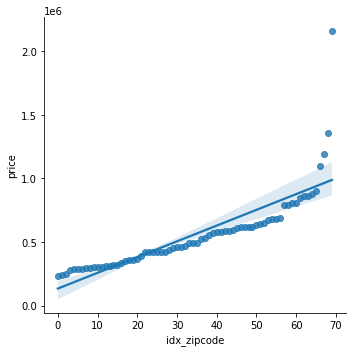

In [333]:
sns.lmplot(data=df_sorted_df, x='idx_zipcode', y='price')